In [2]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA
from skimage import io, color

rgb = io.imread("barack-3.jpg",plugin='matplotlib')
print(rgb.shape)

# convert RGB to LAB
img = color.rgb2lab(rgb)

img_h = img.shape[0] # Image Height
img_w = img.shape[1] # Image Width

N = img_h * img_w  # Total number of pixels in the image


flat_img = img.reshape((N,3))

print("flattened array:")
print(flat_img.shape)

# define a matrix
A = flat_img
# A = array([[1, 2, 30], [1, 1, 1], [7, 2, 7], [7, 2, 9]])
print(A)
# create the PCA instance
pca = PCA(.95)

print("raw pca:")
print(type(pca))

# fit on data
pca.fit(A)

# access values and vectors
print("fcomponents:")
print(pca.components_)
print("explained variance ratio")
print(pca.explained_variance_ratio_)
# transform data
B = pca.transform(A)
print("B:")
print(B)

##
print("mean")
print(pca.mean_)

(74, 50, 3)
flattened array:
(3700, 3)
[[78.20547132 -0.81630117 -1.98204658]
 [77.841946   -0.81698731 -1.98394599]
 [77.06540452 -0.96837487 -2.60908273]
 ...
 [ 3.96860657  0.52309179 -4.19111486]
 [ 5.0601335   0.57027811 -4.76727723]
 [ 5.0601335   0.57027811 -4.76727723]]
raw pca:
<class 'sklearn.decomposition._pca.PCA'>
fcomponents:
[[ 0.99879993 -0.03827984 -0.03055079]
 [ 0.04292668  0.3839083   0.92237287]]
explained variance ratio
[0.82599286 0.16964029]
B:
[[ 30.50047455  -7.58129744]
 [ 30.13746978  -7.59891776]
 [ 29.38675372  -8.26698022]
 ...
 [-43.63108384 -12.29142029]
 [-42.52507089 -12.75788598]
 [-42.52507089 -12.75788598]]
mean
[48.08811961  4.08656305  5.59827734]


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

[[78.20547132 -0.81630117 -1.98204658]
 [77.841946   -0.81698731 -1.98394599]
 [77.06540452 -0.96837487 -2.60908273]
 ...
 [ 3.96860657  0.52309179 -4.19111486]
 [ 5.0601335   0.57027811 -4.76727723]
 [ 5.0601335   0.57027811 -4.76727723]]
[0 0 0 ... 2 2 2]


RuntimeError: matplotlib does not support generators as input

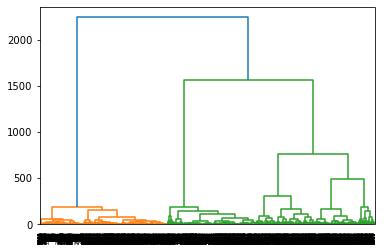

In [4]:
# gets {new means} lst associated w/ cluster/Palette Color, returns two centers 

data = flat_img
print(data)

# map with lambda expression to get first element
first = map(lambda x: x[0], data)
second = map(lambda x: x[1], data)
third = map(lambda x: x[2], data)

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
# plt.show()
hierarchical_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data) 
print(labels)
plt.scatter(first, second, c=labels)
plt.show()

# create two lists




In [ ]:
first_lst = []
second_lst = []

for count, l in enumerate(labels):
    if l == 0:
        first_lst.append(flat_img[count])
    if l == 1:
        second_lst.append(flat_img[count])

x = np.array(first_lst)
y = np.array(second_lst)

print("\n")
print(x.mean(axis=0)) # centroid 1
print(y.mean(axis=0)) # centroid 2

In [ ]:
a = list(zip(flat_img[0], flat_img[1]))
print(a)

##### 